In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import HistGradientBoostingRegressor
import random
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
merged_df = pd.read_csv(r"E:\Crop_yield_Prediction\notebook\merged_data.csv", low_memory=False)

In [4]:
merged_df.head()

,Year,Period,Geo Level,State,Commodity,CONDITION,PROGRESS,PRICE RECEIVED,STOCKS,SALES,...,clay_per,ph,Cation Exchange Capacity,Organic Matter,Available Water Capacity,ksat,slope,elev,Soil_Texture,Soil_Fertility
0,2001,April,STATE,Alabama,COTTON,15.032714,0.000000,93.690957,6.807783e+07,26.143550,...,20.140194,7.147610,2.695492,0.814305,0.132903,2.535661,8.725610,880.484698,Loamy,Moderate Fertility
1,2001,April,STATE,Alabama,SORGHUM,9.049112,77.173252,80.989201,5.455668e+07,15.649264,...,20.140194,7.147610,2.695492,0.814305,0.132903,2.535661,8.725610,880.484698,Loamy,Moderate Fertility
2,2001,April,STATE,Alabama,SOYBEANS,11.218004,49.266514,193.929250,2.403578e+07,15.827956,...,20.140194,7.147610,2.695492,0.814305,0.132903,2.535661,8.725610,880.484698,Loamy,Moderate Fertility
3,2001,April,STATE,Alaska,HAY,8.421371,87.856842,107.126311,0.000000e+00,15.025129,...,20.013527,6.912078,2.887574,0.815230,0.145949,2.330711,3.668050,741.577193,Loamy,Moderate Fertility
4,2001,April,STATE,Arizona,COTTON,15.451718,16.000000,95.319574,7.351657e+07,19.517770,...,21.969892,7.046161,2.793551,0.940471,0.136564,2.527351,8.288559,842.652739,Loamy,Moderate Fertility


**Result**

**Yield Prediction → Crop Recommendation (Regression + Optimization)**

In [5]:
X = merged_df.drop(columns=['YIELD'])     # Features
y = merged_df['YIELD']                    # Target (yield value)

In [6]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((68440, 117), (17111, 117))

**Create an Evaluate Function to give all metrics after model Training**

In [9]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 618.0974
- Mean Absolute Error: 317.0231
- R2 Score: 0.5454
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 619.9866
- Mean Absolute Error: 317.5852
- R2 Score: 0.5530


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 79.3140
- Mean Absolute Error: 17.5216
- R2 Score: 0.9925
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 209.7284
- Mean Absolute Error: 46.7721
- R2 Score: 0.9489


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 110.3472
- Mean Absolute Error: 42.6850
- R2 Score: 0.9855
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 209.2665
- Mean Absolute Error: 60.3272
- R2 Score: 0.9491




**Result**

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,XGBRegressor,0.949077
1,Random Forest Regressor,0.948852
0,Linear Regression,0.553032


In our provided dataset,XGBClassifier is the best method for recommending crops. It offers the best accuracy on the tests performed at 86.78%, showing a balanced performance on training data (94.62%) and test data, indicating generalization without overfitting. Also, the F1 score (86.65%) shows that it is good in both precision and recall, which makes its performance reliable for crop recommendation in different conditions. Also, when used with other models, the accuracy of the model is better than Random Forest and Decision Tree classifiers, which tend to have overfitting issues. It also overcomes simpler models such as Logistic Regression or AdaBoost, showing better accuracy and strength.



**XGB Regression**

In [13]:
xgb_model = XGBRegressor(fit_intercept=True)
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.91


**Plot y_pred and y_test**

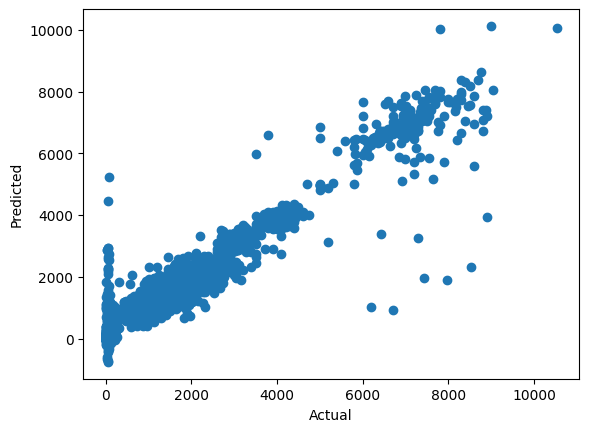

In [14]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

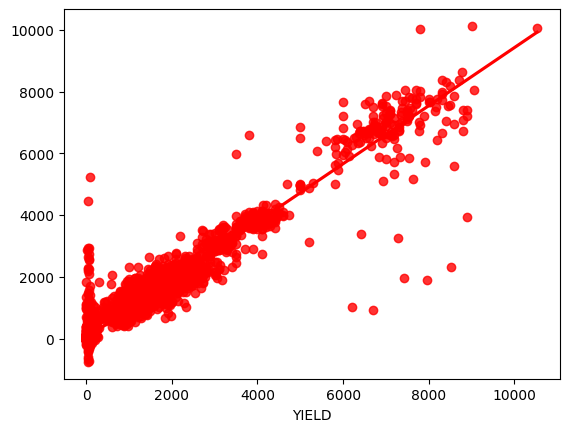

In [15]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [16]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
34576,2194.00,2131.071289,62.928711
41171,43.00,48.365692,-5.365692
50608,1.73,40.198063,-38.468063
20716,10.00,182.471176,-172.471176
4510,84.70,72.630188,12.069812
...,...,...,...
58603,52.00,280.105621,-228.105621
9497,26.00,33.192181,-7.192181
66870,155.00,169.353546,-14.353546
33863,30.00,37.370422,-7.370422
